In [6]:
library('MASS')
library('ggplot2')
library('dplyr')
library('nnet')
options(run.main=FALSE)
source('./epsilon_greedy.R')
source('./softmax.R')
source('./upper_confidence_bound.R')
source('./tompson_bernoulli.R')


Attaching package: ‘dplyr’

The following object is masked from ‘package:MASS’:

    select

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [16]:
plot.regrets <- function(epsilon, k, t){
    cum.regrets <- data.frame(
        'Epsilon-Greedy'=epsilon.greedy(k, c(rep(0.5-epsilon,k-1),0.5), t, epsilon=0.1)$cum.regret,
        'Softmax'=softmax(k, c(rep(0.5-epsilon,k-1),0.5), t)$cum.regret,
        'UCB1'=ucb1(k, c(rep(0.5-epsilon,k-1),0.5), t)$cum.regret,
        'TB'=ucb1(k, c(rep(0.5-epsilon,k-1),0.5), t)$cum.regret)
    matplot(cum.regrets, type='l', col=1:3, pch=1)
    legend("topleft", legend=colnames(cum.regrets), col=1:3, pch=1)
    title(paste0('Epsilon: ',epsilon,' K: ',k,' T:',t), pch=1)
}

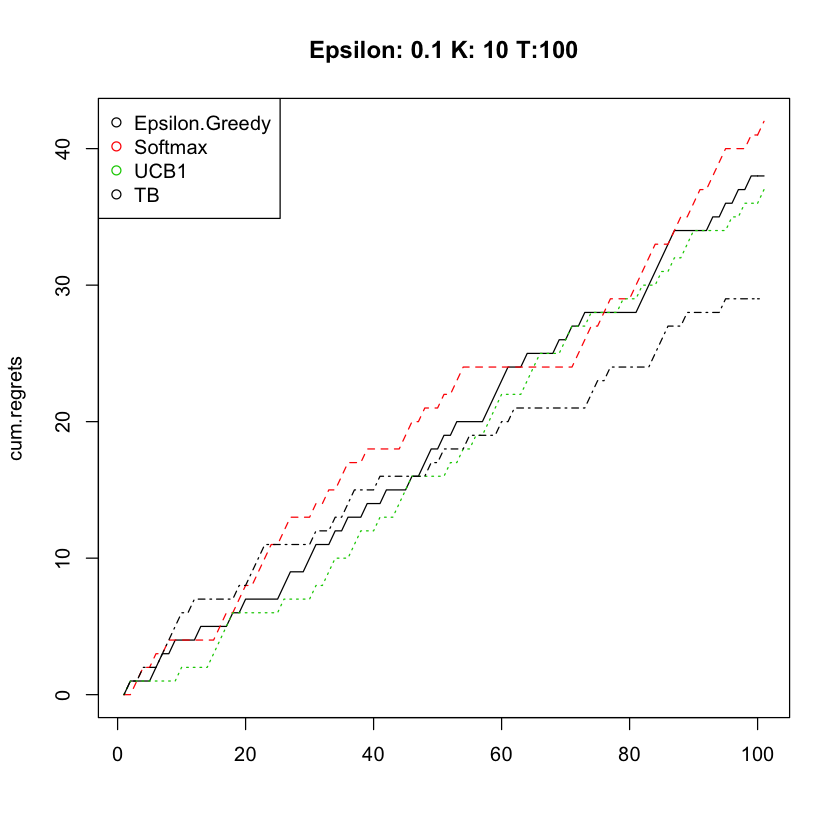

In [19]:
plot.regrets(0.1, 10, 100)

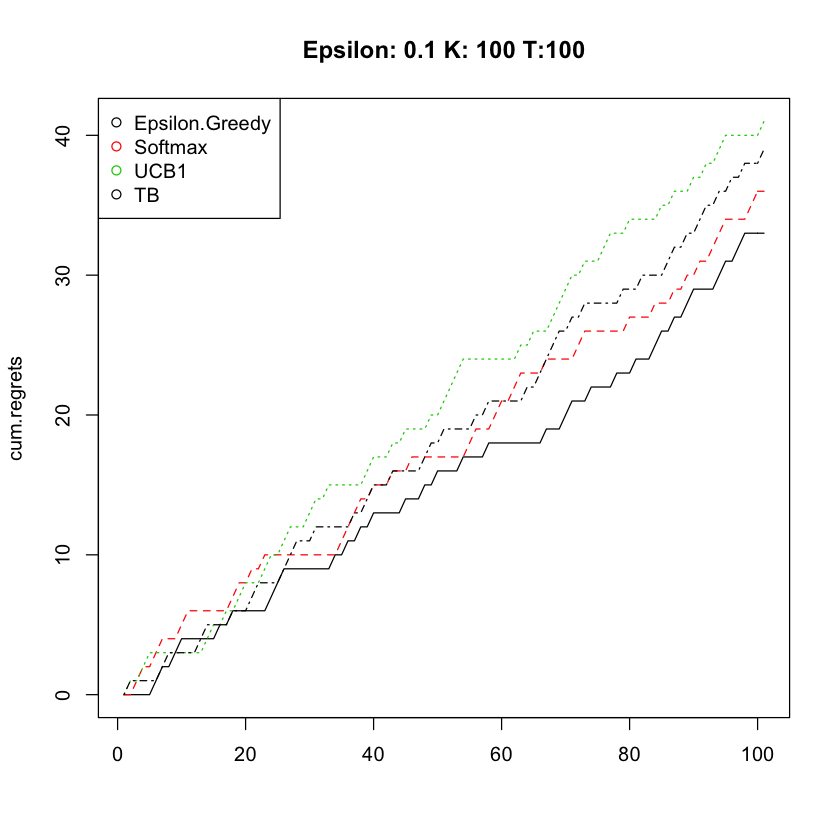

In [20]:
plot.regrets(0.1, 100, 100)

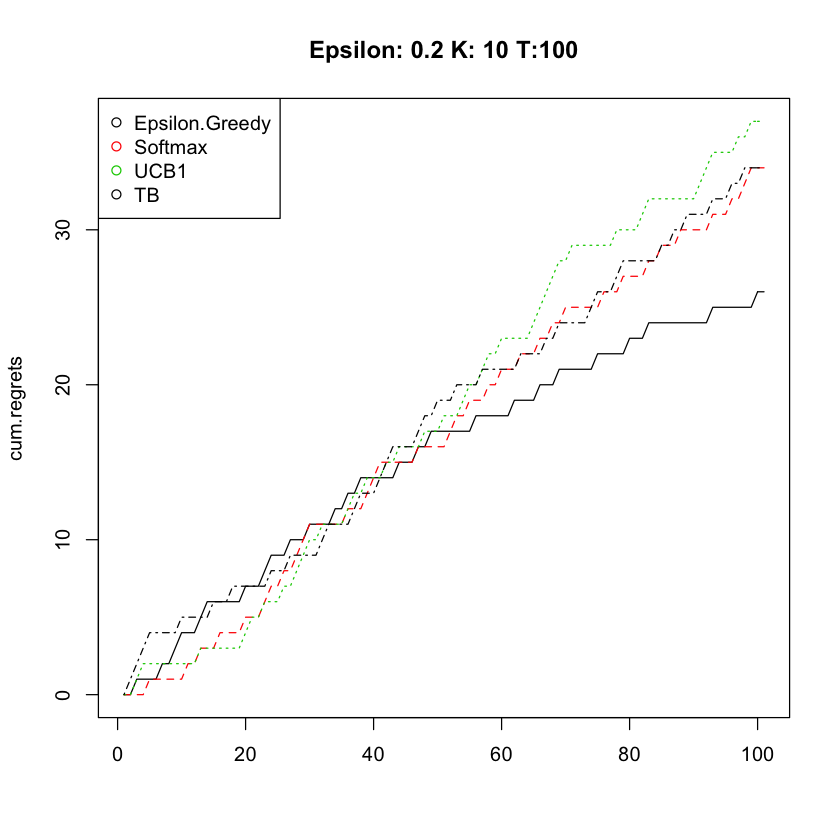

In [21]:
plot.regrets(0.2, 10, 100)

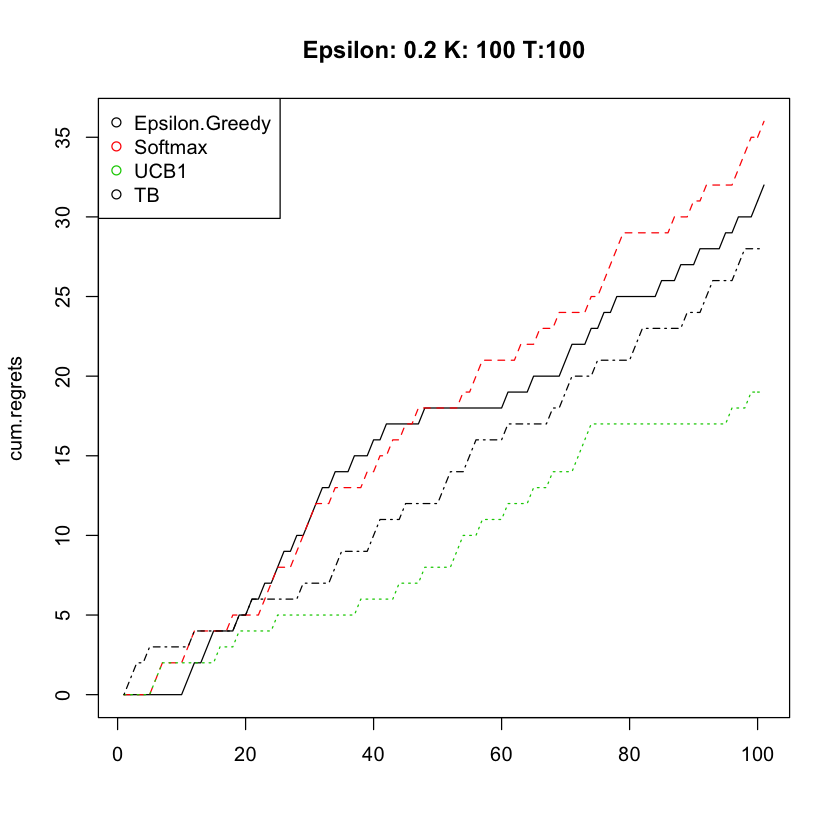

In [22]:
plot.regrets(0.2, 100, 100)

In [7]:
se.kernel <- function(x1, x2) {
    exp(-.5 * (x1 - x2)^2)
}

pdist <- function(x, y, fn) outer(x, y, Vectorize(fn))

posterior <- function(X.train, Y.train, X.test, k = se.kernel) {
    K <- function(X1, X2) pdist(X1, X2, k)
    Mean <- K(X.test, X.train) %*% solve(K(X.train, X.train), Y.train)

    Sigma <- K(X.test, X.test) - K(X.test, X.train) %*%
        solve(K(X.train, X.train), K(X.train,X.test))

    list(y = mvrnorm(1, Mean, Sigma), mean = Mean, var = diag(Sigma))
}

draw <- function (n, k = se.kernel, X = c(), Y = c()) {
    X.test <- sort(runif(n, 0, 10))
    p <- posterior(X, Y, X.test, se.kernel)
    data.frame(x = X.test, y = p$y, mean = p$mean, var = p$var)
}

draws <- function(n, m, X, Y, k = se.kernel) {
    df <- data.frame()
    for (i in 1:m) {
        df <- rbind(df, draw(n, k, X, Y) %>% mutate(draw = as.factor(i)))
    }
    df
}

gen.samples <- function(fn, n=5, m=10) {
    x <- runif(n, 0, m)
    y <- sapply(x, fn)
    cbind(x,y)
}

plot.gp <- function (fn) {
    dat <- gen.samples(fn)
    draws(100, 7, dat[,1], dat[,2]) %>%
        ggplot(aes(x = x)) +
        geom_ribbon(aes(ymin = mean - 1.96*var, ymax = mean + 1.96*var), fill = "grey80") +
        geom_line(aes(y = y, color = draw)) +
        geom_line(aes(y = mean))
}

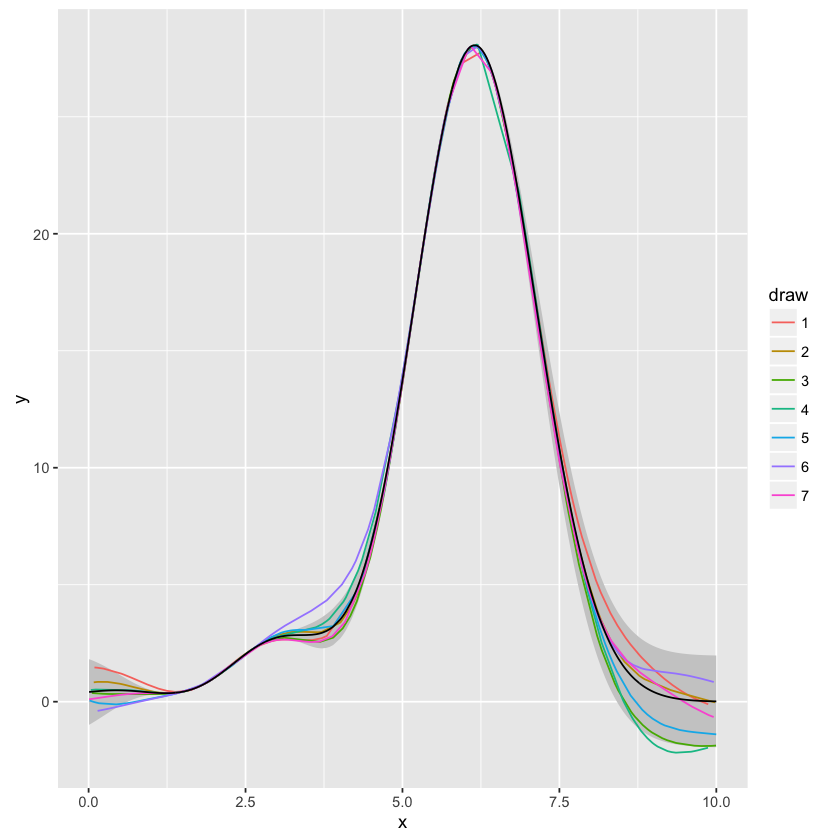

In [11]:
plot.gp(function(x){(x / 2) ** 3})

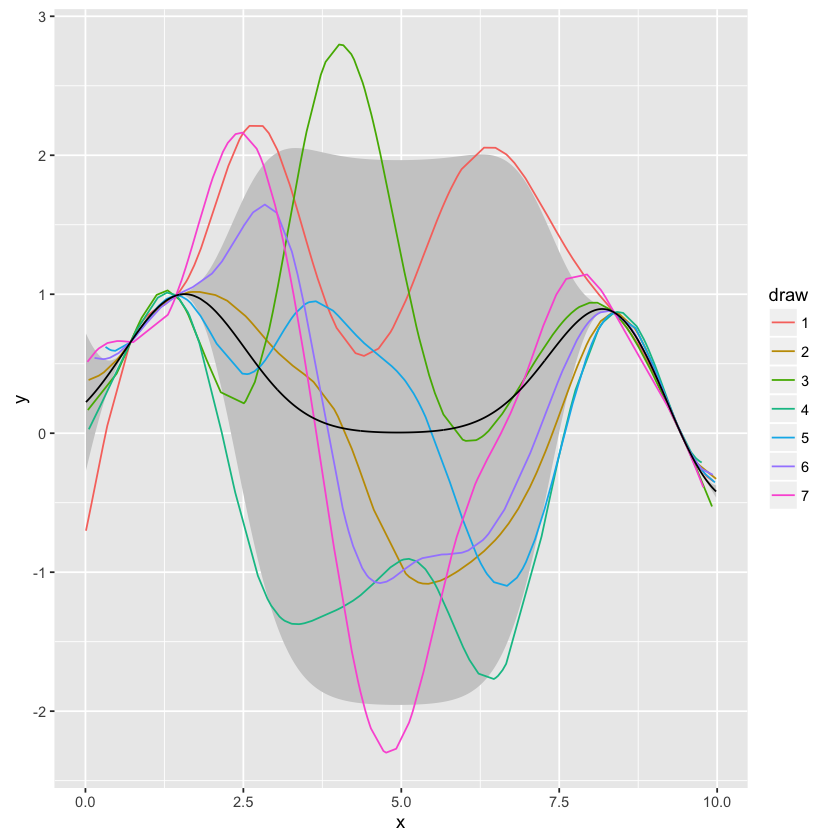

In [10]:
plot.gp(sin)

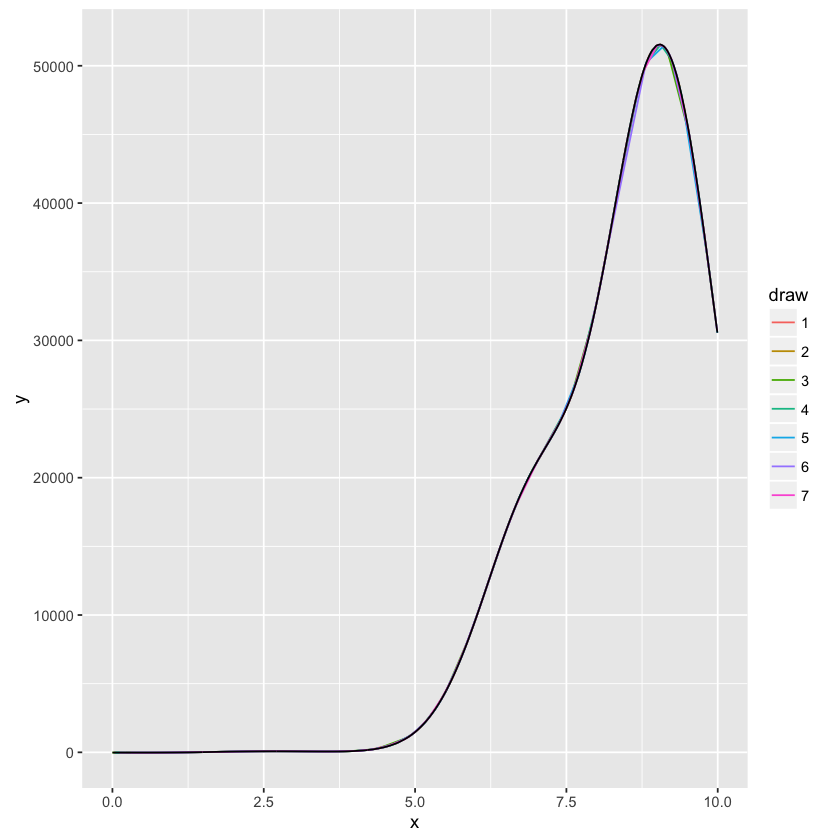

In [14]:
plot.gp(function(x){x ** 5 + sin(x)})